In [0]:
# Import all needed libraries and sublibraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import GaussianNoise
from keras.callbacks import EarlyStopping
import sklearn
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Using TensorFlow backend.


In [0]:
from google.colab import files
files.upload()

In [0]:
input_ = pd.read_csv('StatsVideosXALL.csv')
label = pd.read_csv('StatsVideosYALL.csv')

In [0]:
#Split the data into input (x) training and testing data, and ouput (y) training and testing data, 
#with training data being 80% of the data, and testing data being the remaining 20% of the data
X_train, X_test, y_train, y_test = train_test_split(input_, label, test_size=0.2)

In [0]:
# Scale both training and testing input data
X_train = preprocessing.scale(X_train) 
X_test = preprocessing.scale(X_test)

In [0]:
#Define a gaussian noise layer
class NoiseLayer(keras.layers.Layer):

    def __init__(self,mean,std):
        super(NoiseLayer, self).__init__()
        self.mean = mean
        self.std  = std
    def call(self, input):
        mean = self.mean
        std  = self.std
        return input + tf.random.normal(tf.shape(input), 
                                    mean = mean,
                                    stddev = std)

In [0]:
#define the model
model = Sequential()
model.add(Dense(64, input_shape=(3,), activation='relu')) #three inputs(dislike, like and subscribe)
model.add(Dense(64, activation ='relu'))
model.add(NoiseLayer(mean = 0.1, std = 0.1)) #Gaussian Noise added for experiment
model.add(Dense(512, activation='relu'))
model.add(GaussianNoise(0.01, input_shape=(2,)))
model.add(Dense(1,))
model.add(Dense(1,))

model.compile(Adam(lr=0.001), 'mean_squared_error')

#Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

history = model.fit(X_train, y_train, epochs = 1000, validation_split = 0.2, shuffle= True,verbose = 0, callbacks =[earlystopper])
history_dic = history.history

Epoch 00053: early stopping


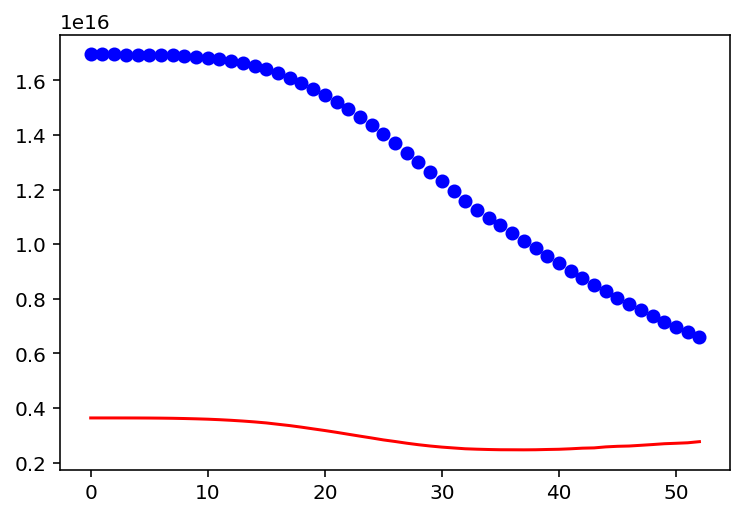

In [0]:
history_dic = history.history
#plot model's cost/loss and model's validation_split cost/loss
loss_values = history_dic['loss']
validation_loss_values = history_dic['val_loss']
plt.figure()
plt.plot(loss_values,'bo', label = 'training_loss')
plt.plot(validation_loss_values, 'r',label = 'val train values')

In [0]:
#Run the model with its current training weights and testing data
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
print(X_train.shape)

(2691, 3)


In [0]:
#Try with some data
data = [[2,3,4], [2,6,4], [1,2,3],[1,2,6],[1,2,8]]
data = np.array(data)
print(data)

[list([2, 3]) list([2, 6, 4]) list([1, 2, 3]) list([1, 2, 6])
 list([1, 2, 8])]


In [0]:
#Calculate and prints R^2 score of training and testing data
print("The R2 score on the Train set is:{:0.3f}".format(r2_score(y_train, y_train_prediction)))
print("The R2 score on the Test set is:{:0.3f}".format(r2_score(y_test, y_test_prediction)))

The R2 score on the Train set is:0.585
The R2 score on the Test set is:0.674


<Figure size 432x288 with 0 Axes>

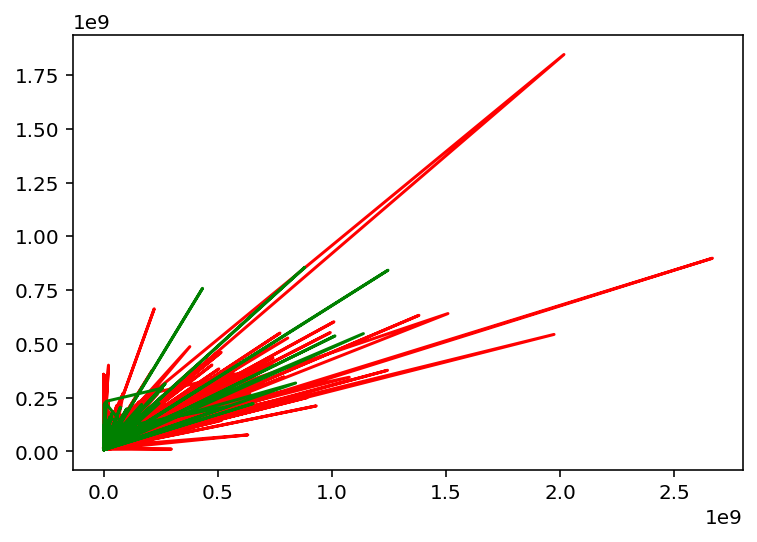

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(y_train, y_train_prediction,'r')
plt.plot(y_test, y_test_prediction, 'g')
plt.figure()